In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('../../datasets/customer-churn-model/Customer Churn Model.txt')
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
%matplotlib inline

In [4]:
# savefig 'path donde guardar la imagen'


## Scatterplot

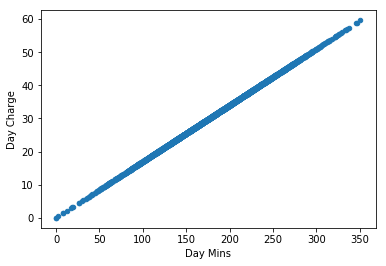

In [5]:
df.plot(kind='scatter', x='Day Mins', y = 'Day Charge')

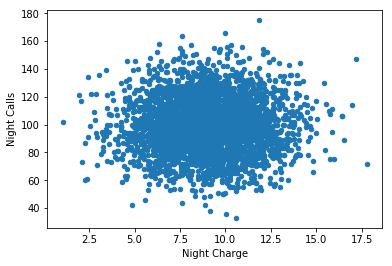

In [6]:
df.plot(kind='scatter', x='Night Charge', y='Night Calls')

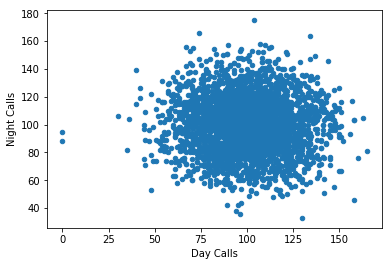

In [7]:
df.plot(kind='scatter', x='Day Calls', y='Night Calls')

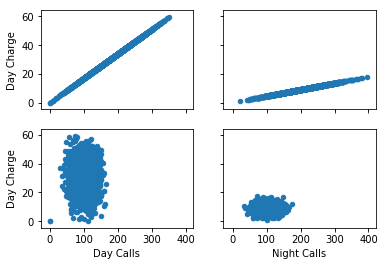

In [8]:
# Paneles
figure, axs = plt.subplots(2,2, sharey=True, sharex=True)
df.plot(kind='scatter', x='Day Mins', y='Day Charge', ax=axs[0][0])
df.plot(kind='scatter', x='Night Mins', y='Night Charge', ax=axs[0][1])
df.plot(kind='scatter', x='Day Calls', y='Day Charge', ax=axs[1][0])
df.plot(kind='scatter', x='Night Calls', y='Night Charge', ax=axs[1][1])


### Histograma

Text(0, 0.5, 'Frecuencia')

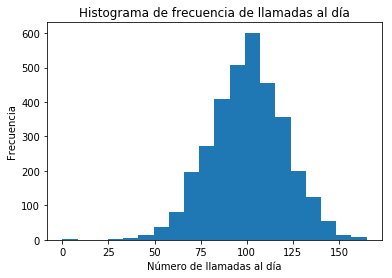

In [9]:
plt.hist(df['Day Calls'], bins=20)
plt.title('Histograma de frecuencia de llamadas al día')
plt.xlabel("Número de llamadas al día")
plt.ylabel('Frecuencia')


Para saber cuántos cortes tengo que hacer usamos la regla de Sturges:

https://es.wikipedia.org/wiki/Regla_de_Sturges

![figura](https://wikimedia.org/api/rest_v1/media/math/render/svg/29be5c6fe5666db78c6f44295633c59bd278254d)

Siendo M el tamaño de la muestra

In [10]:
df.shape

(3333, 21)

Siendo 3333 el tamaño de la muestra, su logaritmo en base 2 es:
    


In [15]:
math.log(3333,2)

11.70260560211025

Así que como 12 elementos va bien

Text(0, 0.5, 'Frecuencia')

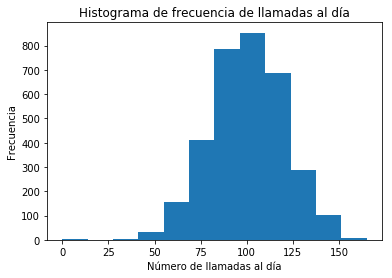

In [18]:
plt.hist(df['Day Calls'], bins=int(math.log(3333,2)+1))
plt.title('Histograma de frecuencia de llamadas al día')
plt.xlabel("Número de llamadas al día")
plt.ylabel('Frecuencia')

### Box Plot o diagrama de caja y bigotes

Es una de las mejores formas que existen de ver una distribución de una variable numérica.


Text(0.5, 1.0, 'Boxplot de el número de llamadas diarias')

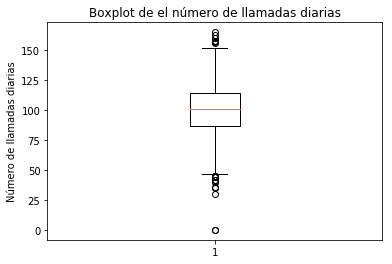

In [21]:
plt.boxplot(df['Day Calls'])
plt.ylabel("Número de llamadas diarias")
plt.title("Boxplot de el número de llamadas diarias")

Estos valores es cómo se distribuyen los datos. La caja indica la gran mayoría de los datos. 

La caja empieza en el valor que ocupa el 25% (cuantil) y el borde superior el 75%.

La mediana es el punto rojo.

In [25]:
print(df['Day Calls'].median())
df['Day Calls'].describe()

101.0


count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

El rango intercuantilico, esto es, el tamaño de la caja será desde el 25% al 75%. 

El rango intercuantílico en este caso es 114-87 = 27

El bigote se coloca a 1,5 veces el rango intercuantilico.


El resto se pintan como bolitas.

Por lo tanto, el bigote será , el menor :
```
87 - 1.5* 27
```
Y el bigote superior:
```
114 + 1.5 * 27
```

El resto serían outliers. Se representan con bolitas.